### Actor-Critic(AC)介绍

AC算法结合了**策略梯度方法（Actor）**和**值函数估计方法（Critic）**的优点
  - Actor 学习策略函数 π(a|s;θ)，负责生成动作
  - Critic 学习值函数 V(s;w) 或 Q(s,a;w)，评估当前策略的好坏

#### **策略梯度定理（Policy Gradient Theorem）**（见REINFORCE）

该定理指出

目标函数关于策略参数 $\theta$ 的梯度为：

$$
\nabla_\theta J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta} \left[ \sum_{t=0}^{\infty} \nabla_\theta \log \pi_\theta(a_t|s_t) \, Q^{\pi_\theta}(s_t, a_t) \right]
$$

$$
\mathbb{E}_{a \sim \pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a|s) \cdot b(s) \right] = b(s) \cdot \nabla_\theta \underbrace{\mathbb{E}_{a \sim \pi_\theta} [\log \pi_\theta(a|s)]}_{=1} = 0
$$

所以加减任意只依赖于状态的基线 $b(s)$（如 $V^{\pi_\theta}(s)$）不会改变梯度的期望，但可显著降低方差。

#### **TD Error**

Critic 使用 **TD 误差** 作为学习信号，也作为 Actor 的优势函数近似：

$$
\delta_t = r_t + \gamma V(s_{t+1}; w) - V(s_t; w)
$$

#### **Actor更新**

使用策略梯度定理，目标是最大化期望回报，梯度为：

$$
\nabla_\theta J(\theta) = \mathbb{E} \left[ \delta_t \, \nabla_\theta \log \pi(a_t | s_t; \theta) \right]
$$

因此，Actor 参数更新为：

$$
\theta \leftarrow \theta + \alpha_\theta \, \delta_t \, \nabla_\theta \log \pi(a_t | s_t; \theta)
$$

其中 $\alpha_\theta$ 是 Actor 的学习率。

> ✅ 注意：$\delta_t$ 在此充当**优势函数** $A(s_t, a_t) = Q(s_t, a_t) - V(s_t)$ 的无偏估计（因 $Q(s_t, a_t) \approx r_t + \gamma V(s_{t+1})$）。

#### **Critic更新**

最小化 TD 误差的平方损失：

$$
\mathcal{L}_{\text{critic}}(w) = \frac{1}{2} \delta_t^2
$$

梯度下降更新：

$$
w \leftarrow w + \alpha_w \, \delta_t \, \nabla_w V(s_t; w)
$$

其中 $\alpha_w$ 是 Critic 的学习率。

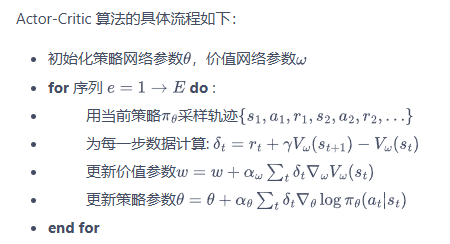